---   
 <img align="left" width="50" height="50"  src="https://upload.wikimedia.org/wikipedia/en/c/c8/University_of_the_Punjab_logo.png"> 

<h1 align="center">Department of Data Science</h1>
<h1 align="center">Classification Hands On Quiz</h1>

---
<h3><div align="right">Instructor: Muhammad Arif Butt, Ph.D.</div></h3>    

# 1. Load Dataset and Perform EDA

In [1]:
import pandas as pd
df=pd.read_csv('Datasets/Disease-Quiz.csv')
df.head()

,Age,Gender,BP,Smoker_Status,Disease
0,43.0,Male,180.0,NaN,diseased
1,18.0,Male,NaN,Smoker,not diseased
2,NaN,Female,170.0,Non-smoker,diseased
3,25.0,NaN,160.0,Non-smoker,diseased
4,45.0,Female,130.0,Smoker,not diseased


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
df.isna().sum()

Age              3
Gender           2
BP               2
Smoker_Status    3
Disease          0
dtype: int64

In [4]:
df.describe()

,Age,BP
count,47.000000,48.00000
mean,45.063830,143.06250
std,25.427992,33.41958
min,12.000000,25.00000
25%,31.500000,125.75000
50%,35.000000,153.50000
75%,51.500000,170.00000
max,138.000000,185.00000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            47 non-null     float64
 1   Gender         48 non-null     object 
 2   BP             48 non-null     float64
 3   Smoker_Status  47 non-null     object 
 4   Disease        50 non-null     object 
dtypes: float64(2), object(3)
memory usage: 2.1+ KB


### (iii) Detect and Handle Outliers

<AxesSubplot:xlabel='Age'>

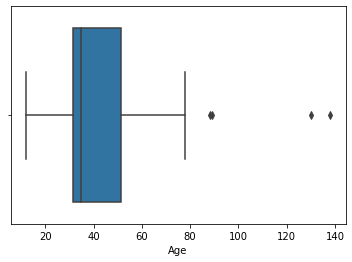

In [6]:
sns.boxplot(x=df['Age'],data=df)

<AxesSubplot:xlabel='BP'>

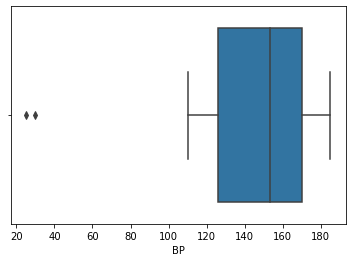

In [7]:
sns.boxplot(x=df['BP'],data=df)

In [8]:
q1 = df['BP'].quantile(0.25)
q3 = df['BP'].quantile(0.75)
iqr = q3 - q1
iqr

44.25

In [9]:
lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr
lower_limit, upper_limit

(59.375, 236.375)

In [10]:

df['BP'] = np.where(df['BP'] < lower_limit, lower_limit,
                          (np.where(df['BP'] > upper_limit, upper_limit, df['BP']))
                          )


<AxesSubplot:xlabel='BP'>

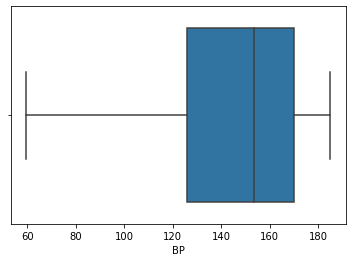

In [11]:
sns.boxplot(x=df['BP'],data=df)

<AxesSubplot:xlabel='Age', ylabel='Count'>

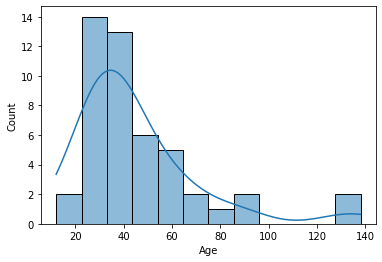

In [13]:
sns.histplot(x=df['Age'],data=df,kde= True)

In [14]:
mu = df['Age'].mean()
sigma = df['Age'].std()

upper_limit = mu +3 *sigma
lower_limit = mu - 3*sigma

upper_limit,lower_limit

(121.34780676396065, -31.220147189492565)

In [15]:

df['Age'] = np.where(df['Age'] < lower_limit, lower_limit,
                          (np.where(df['Age'] > upper_limit, upper_limit, df['Age']))
                          )


<AxesSubplot:xlabel='Age', ylabel='Count'>

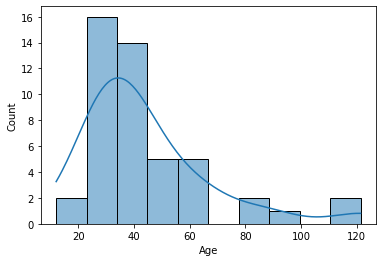

In [16]:
sns.histplot(x=df['Age'],data=df,kde= True)

<AxesSubplot:xlabel='Age'>

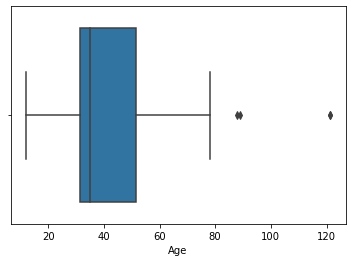

In [17]:
sns.boxplot(x=df['Age'],data=df)

In [18]:
mu = df['Age'].mean()
sigma = df['Age'].std()

upper_limit = mu +3 *sigma
lower_limit = mu - 3*sigma

upper_limit,lower_limit

(115.1819121109787, -26.131034939577788)

In [19]:

df['Age'] = np.where(df['Age'] < lower_limit, lower_limit,
                          (np.where(df['Age'] > upper_limit, upper_limit, df['Age']))
                          )


<AxesSubplot:xlabel='Age', ylabel='Count'>

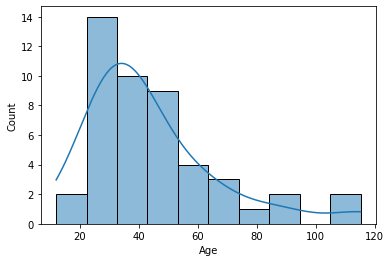

In [20]:
sns.histplot(x=df['Age'],data=df,kde= True)

<AxesSubplot:xlabel='Age'>

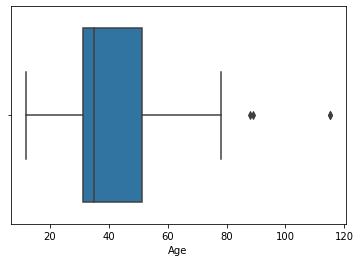

In [21]:
sns.boxplot(x=df['Age'],data=df)

In [23]:
df.columns

Index(['Age', 'Gender', 'BP', 'Smoker_Status', 'Disease'], dtype='object')

# 2. Do a Train-Test Split of your Dataset using Hold-out Set

In [24]:
X = df.drop('Disease', axis =1)
y = df['Disease']
X.shape

(50, 4)

In [25]:
X_train,X_holdout,y_train,y_holdout = train_test_split(X,y,test_size=0.10,random_state=42)
X_train.shape,X_holdout.shape,y_train.shape,y_holdout.shape

((45, 4), (5, 4), (45,), (5,))

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size=0.15,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((34, 4), (6, 4), (34,), (6,))

In [28]:
X_train.head()

,Age,Gender,BP,Smoker_Status
15,34.0,Male,176.000,Non-smoker
25,66.0,Male,126.000,Smoker
49,44.0,Female,132.000,Non-smoker
5,12.0,Male,59.375,Non-smoker
7,33.0,Male,185.000,Smoker


# 3. Data Preprocessing and Feature Engineering

### (i) Missing Value Imputation

In [37]:
si = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
si.fit(X_train.iloc[:,1:4:2])
# we can also use iloc[:[2,4]]

SimpleImputer(strategy='most_frequent')

In [39]:
X_train.iloc[:,1:4:2] = si.transform(X_train.iloc[:,1:4:2])
X_test.iloc[:,1:4:2] = si.transform(X_test.iloc[:,1:4:2])

In [40]:
si = SimpleImputer(missing_values=np.nan,strategy='mean')
si.fit(X_train.iloc[:,0:4:2])

SimpleImputer()

In [41]:
X_train.iloc[:,0:4:2] = si.transform(X_train.iloc[:,0:4:2])
X_test.iloc[:,0:4:2] = si.transform(X_test.iloc[:,0:4:2])

In [42]:
X_train.isna().sum()

Age              0
Gender           0
BP               0
Smoker_Status    0
dtype: int64

### (ii) Encode Categorical Features

In [45]:
ohe = OneHotEncoder(drop='first',sparse=False,dtype=np.int32)

tranformer = ColumnTransformer(transformers=[('Onehot',ohe,[1,3]),
                                            ],
                              remainder='passthrough')

In [46]:
tranformer.fit(X_train)

X_train_encode = tranformer.transform(X_train)
X_tesy_encode = tranformer.transform(X_test)

In [47]:
X_train_encode

array([[  1.        ,   0.        ,  34.        , 176.        ],
       [  1.        ,   1.        ,  66.        , 126.        ],
       [  0.        ,   0.        ,  44.        , 132.        ],
       [  1.        ,   0.        ,  12.        ,  59.375     ],
       [  1.        ,   1.        ,  33.        , 185.        ],
       [  0.        ,   1.        ,  32.        , 120.        ],
       [  1.        ,   0.        ,  25.        , 160.        ],
       [  1.        ,   1.        ,  23.        , 140.        ],
       [  1.        ,   1.        ,  31.        , 123.        ],
       [  0.        ,   1.        , 115.18191211, 175.        ],
       [  1.        ,   0.        ,  32.        , 120.        ],
       [  1.        ,   1.        ,  24.        , 175.        ],
       [  1.        ,   0.        ,  28.        , 158.        ],
       [  1.        ,   0.        ,  43.54261951, 131.        ],
       [  0.        ,   1.        ,  45.        , 130.        ],
       [  1.        ,   1

In [51]:
le = LabelEncoder()

le.fit(y_train)

LabelEncoder()

In [52]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)
y_holdout = le.transform(y_holdout)

### (iii) Detect and Handle Outliers

### (iv) Feature Scaling

In [48]:
ss = StandardScaler()
ss.fit(X_train_encode)

StandardScaler()

In [50]:
X_train_scale = ss.transform(X_train_encode)
X_test_scale = ss.transform(X_tesy_encode)

# 4. Model Training

In [53]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [54]:
lr.fit(X_train_scale,y_train)

LogisticRegression()

In [56]:
y_pred = lr.predict(X_test_scale)

# 5. Model Evaluation

In [57]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import classification_report


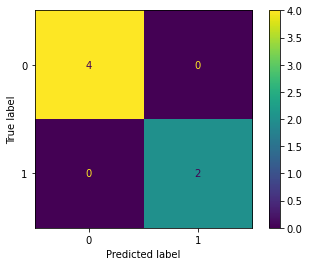

In [58]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [59]:
accuracy_score(y_test, y_pred)

1.0

In [60]:
recall_score(y_test, y_pred)

1.0

In [61]:
print("Precision: ", precision_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Precision:  1.0
F1 Score: 1.0


In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



# 6. Hyperparameter Tuning

# 7. Create a Pipelined Model

In [63]:
categorical_tranformer = Pipeline(steps=[('imputer',SimpleImputer(missing_values=np.nan,strategy='most_frequent')),
                                        ('ohe',OneHotEncoder(drop='first',handle_unknown='ignore'))])

In [64]:
numerical_tranformer = Pipeline(steps=[('impute',SimpleImputer(missing_values=np.nan,strategy='mean'))])

In [65]:
preprocessor = ColumnTransformer(transformers=[('numerical',numerical_tranformer,[0,2]),
                                              ('categorical',categorical_tranformer,[1,3])],
                                remainder='passthrough')

In [66]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                       ("scaling",StandardScaler(with_mean=False)),
                       ('classify',LogisticRegression())])

In [67]:
model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer())]),
                                                  [0, 2]),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  [1, 3])])),
                ('scaling', 

In [69]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

skf =StratifiedKFold()

print("f1 Score:", cross_val_score(model,X_train, y_train, cv=skf, scoring='f1').mean())

f1 Score: 0.9492063492063492


In [70]:
y_pred = model.predict(X_test)

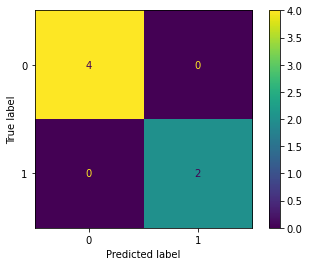

In [71]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [72]:
y_pred_holdout = model.predict(X_holdout)

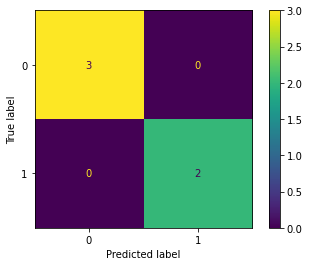

In [73]:
ConfusionMatrixDisplay.from_predictions(y_holdout, y_pred_holdout);

# 8. Serialize the Model and Carry out Prediction

In [74]:
import joblib
joblib.dump(model,'lr_classification.pkl')

['lr_classification.pkl']

In [79]:
loaded_model = joblib.load('lr_classification.pkl')

In [80]:
age = 23
gender = 'Male'
bp = 132
smoking_status = 'Smoker'

In [81]:
test_input = np.array([[age, gender, bp, smoking_status]], dtype='object')

In [82]:
print("loaded_model", loaded_model.predict(test_input))

C:\Users\saadr\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\saadr\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


ValueError: SimpleImputer does not support data with dtype <U11. Please provide either a numeric array (with a floating point or integer dtype) or categorical data represented either as an array with integer dtype or an array of string values with an object dtype.

# 9. Deploy your model on Local Machine using Streamlit